In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('./iris.csv', header=None, delimiter=",") 
data = pd.DataFrame(data)

In [3]:
data.isna().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [4]:
dublicate_data = data.copy()
dublicate_data.drop_duplicates(subset=None,inplace=True)
dublicate_data.shape

(147, 5)

In [5]:
data.shape

(150, 5)

In [6]:
data = dublicate_data

In [7]:
data.shape

(147, 5)

In [19]:
x = data.drop(4,axis=1)
y = data.drop([0,1,2,3], axis=1)


pandas.core.frame.DataFrame

<Axes: >

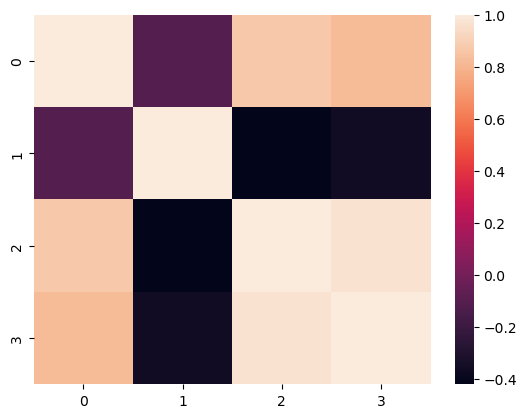

In [9]:
corr = x.corr()
sns.heatmap(corr)

In [10]:
corr

,0,1,2,3
0,1.000000,-0.109321,0.871305,0.817058
1,-0.109321,1.000000,-0.421057,-0.356376
2,0.871305,-0.421057,1.000000,0.961883
3,0.817058,-0.356376,0.961883,1.000000


In [22]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(x)
scaled_data = pd.DataFrame(scaled_data)

pandas.core.frame.DataFrame

In [12]:
model = KMeans(n_clusters=3)
model.fit(scaled_data)



/Users/dimi67ch/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [13]:
prediction = model.labels_
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [14]:
cluster_centres = model.cluster_centers_
cluster_centres

array([[0.70726496, 0.4508547 , 0.79704476, 0.82478632],
       [0.19733796, 0.59635417, 0.07838983, 0.0625    ],
       [0.44166667, 0.30763889, 0.57372881, 0.54583333]])

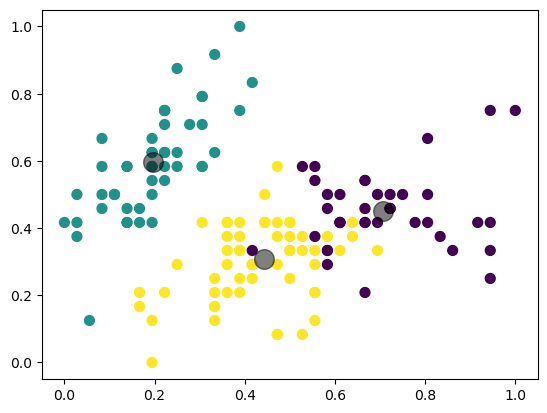

In [23]:
plt.scatter(scaled_data.iloc[:, 0], scaled_data.iloc[:, 1], c=prediction, s=50, cmap='viridis')

centers = cluster_centres
plt.scatter(centers[:,0], centers[:,1],c='black', s=200, alpha=0.5)